**Keras Sub class Api**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing()


In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu"):
        super().__init__()
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=40, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/40
363/363 [==============================] - 5s 9ms/step - loss: 1.0406 - output_1_loss: 0.8777 - output_2_loss: 2.5069 - val_loss: 0.6023 - val_output_1_loss: 0.5292 - val_output_2_loss: 1.2602
Epoch 2/40
363/363 [==============================] - 2s 5ms/step - loss: 0.6183 - output_1_loss: 0.5501 - output_2_loss: 1.2320 - val_loss: 0.5308 - val_output_1_loss: 0.4681 - val_output_2_loss: 1.0957
Epoch 3/40
363/363 [==============================] - 2s 7ms/step - loss: 0.5368 - output_1_loss: 0.4767 - output_2_loss: 1.0769 - val_loss: 0.5006 - val_output_1_loss: 0.4490 - val_output_2_loss: 0.9645
Epoch 4/40
363/363 [==============================] - 3s 7ms/step - loss: 0.5058 - output_1_loss: 0.4559 - output_2_loss: 0.9555 - val_loss: 0.4793 - val_output_1_loss: 0.4370 - val_output_2_loss: 0.8601
Epoch 5/40
363/363 [==============================] - 3s 9ms/step - loss: 0.4860 - output_1_loss: 0.4442 - output_2_loss: 0.8615 - val_loss: 0.4652 - val_output_1_loss: 0.4298 - val_ou

In [ ]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 2ms/step - loss: 0.3657 - output_1_loss: 0.3506 - output_2_loss: 0.5016


[0.36572638154029846, 0.3506295382976532, 0.5015981197357178]

In [ ]:
predictions = model.predict([X_new_A, X_new_B])


1/1 [==============================] - 0s 102ms/step


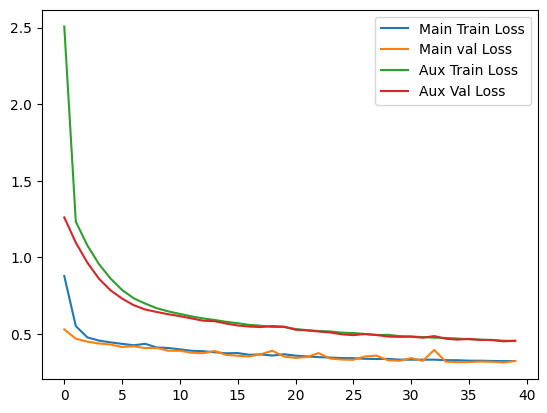

In [ ]:
plt.plot(history.history['output_1_loss'], label='Main Train Loss')
plt.plot(history.history['val_output_1_loss'], label='Main val Loss')
plt.plot(history.history['output_2_loss'], label='Aux Train Loss')
plt.plot(history.history['val_output_2_loss'], label='Aux Val Loss')
plt.legend()
plt.show()
